In [35]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


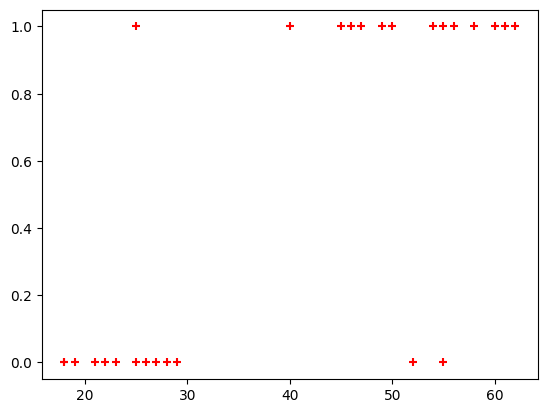

In [37]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [38]:
df.shape

(27, 2)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [41]:
X_test

,age
24,50
0,22
11,28


In [42]:
Y_train.shape

(24,)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train,Y_train)

LogisticRegression()

In [46]:
model.predict(X_test)

array([1, 0, 0], dtype=int64)

In [47]:
model.score(X_test,Y_test)

1.0

In [48]:
model.predict_proba(X_test)

array([[0.19284169, 0.80715831],
       [0.88533864, 0.11466136],
       [0.78570161, 0.21429839]])

**Logistic regression for multiclass classification**

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [50]:
digits = load_digits()

In [51]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [52]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

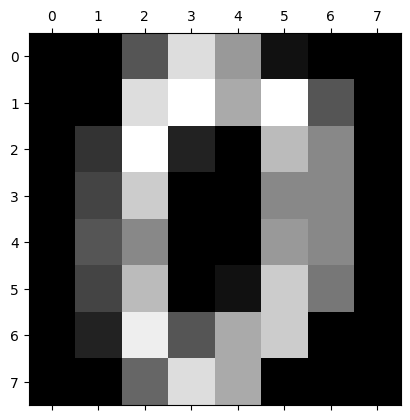

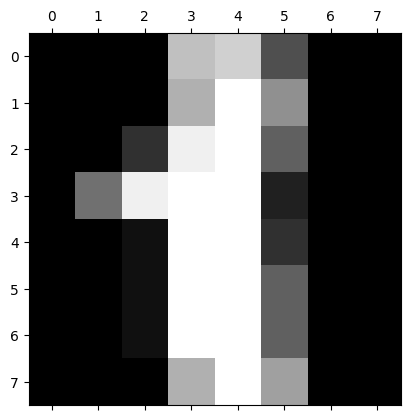

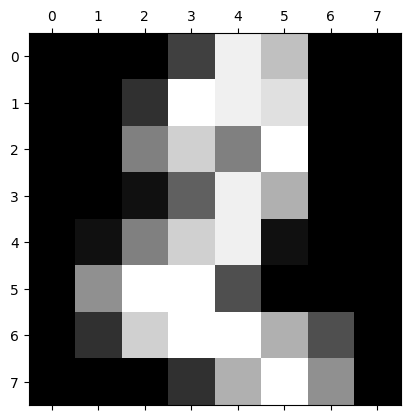

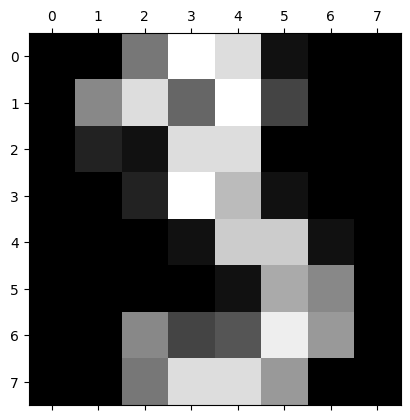

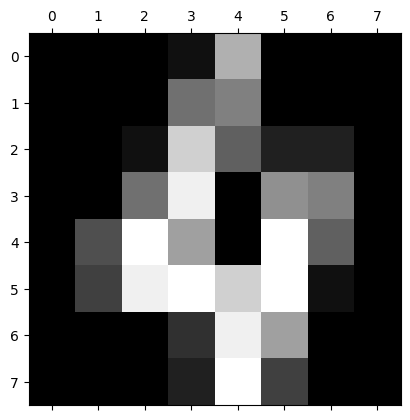

In [53]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [54]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(digits.data,digits.target,test_size=0.2)
len(X_train)

1437

In [56]:
len(X_test)

360

In [57]:
from sklearn import linear_model
model = linear_model.LogisticRegression()

In [58]:
model.fit(X_train,Y_train)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
model.score(X_test,Y_test)

0.9666666666666667

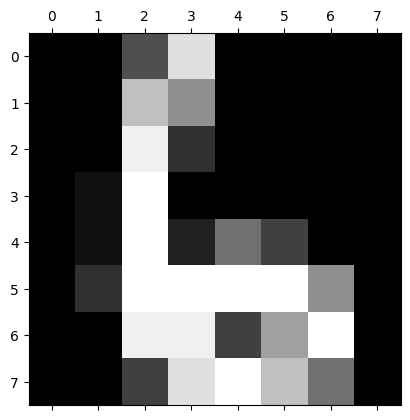

In [60]:
plt.matshow(digits.images[67])

In [61]:
digits.target[67]

6

In [62]:
model.predict([digits.data[67]])

array([6])

In [63]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [64]:
import joblib
joblib.dump(model,'predict number')

['predict number']

In [65]:
m = joblib.load('predict number')
m.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [66]:
Y_prediction = m.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,Y_prediction)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 27,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 38,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 35]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

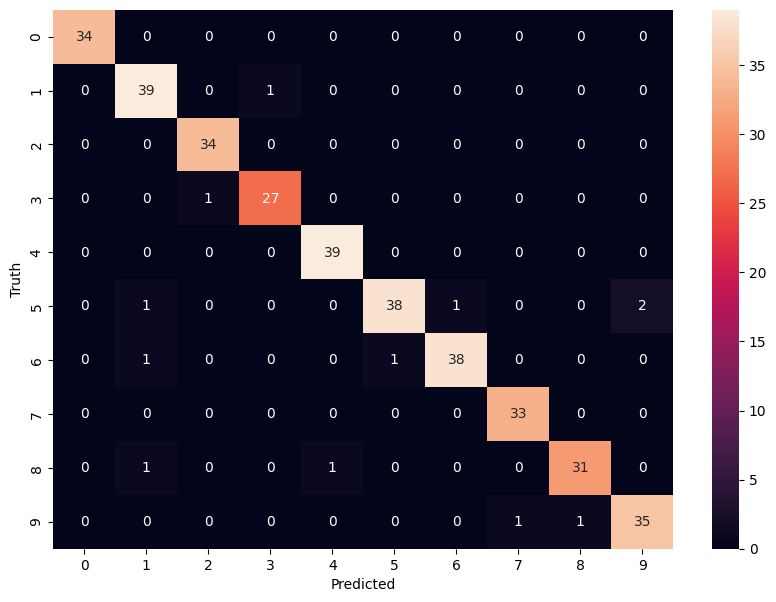

In [67]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")